In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['marsabit', 'port elizabeth', 'hilo', 'touros', 'ancud', 'mataura', 'provideniya', 'yellowknife', 'kavieng', 'lasa']


In [20]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
temp = []
humidity = []
cloudiness = []
wind_speed = []
# Create for loop for temperatures in city list
for city in cities:
    try:      
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f"The temperature in {city} is {temp} C.")
        
    except:
        print('Main not found')
        pass


The temperature in marsabit is [72.45] C.
The temperature in port elizabeth is [72.45, 80.89] C.
The temperature in hilo is [72.45, 80.89, 73.08] C.
The temperature in touros is [72.45, 80.89, 73.08, 81.5] C.
The temperature in ancud is [72.45, 80.89, 73.08, 81.5, 44.13] C.
The temperature in mataura is [72.45, 80.89, 73.08, 81.5, 44.13, 47.48] C.
The temperature in provideniya is [72.45, 80.89, 73.08, 81.5, 44.13, 47.48, 46.76] C.
The temperature in yellowknife is [72.45, 80.89, 73.08, 81.5, 44.13, 47.48, 46.76, 54.05] C.
The temperature in kavieng is [72.45, 80.89, 73.08, 81.5, 44.13, 47.48, 46.76, 54.05, 82.85] C.
The temperature in lasa is [72.45, 80.89, 73.08, 81.5, 44.13, 47.48, 46.76, 54.05, 82.85, 68.4] C.


In [21]:
cities_df = pd.DataFrame({'Cities': cities, 'Latitude': lats, 'Longitude': lngs, 'Temperature': temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed})
cities_df

,Cities,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,marsabit,2.194905,38.377061,72.45,39,78,15.30
1,port elizabeth,-68.928595,31.865715,80.89,19,0,9.22
2,hilo,16.367007,-146.357659,73.08,94,75,4.61
3,touros,0.107890,-27.042822,81.50,61,12,17.13
4,ancud,-41.015674,-74.688860,44.13,65,56,4.90
5,mataura,-57.636913,-148.891309,47.48,88,100,1.66
6,provideniya,65.785785,-173.261701,46.76,99,100,10.45
7,yellowknife,86.178665,-98.098481,54.05,62,75,5.01
8,kavieng,-2.798021,150.335705,82.85,75,59,13.44
9,lasa,32.056720,92.686815,68.40,71,63,6.53


In [22]:
cities_df.to_csv("../cities_output_student.csv", encoding="utf-8", index=False) 

Text(0.5, 1.0, 'Temperature (F) vs. Latitude')

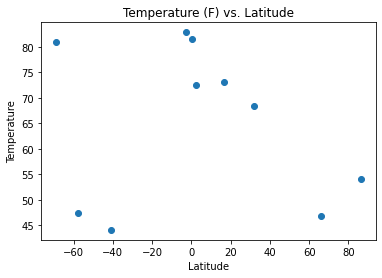

In [23]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature (F) vs. Latitude')

Text(0.5, 1.0, 'Humidity (%) vs. Latitude')

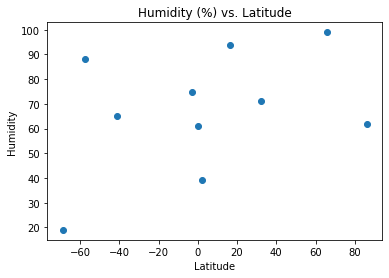

In [24]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity (%) vs. Latitude')

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude')

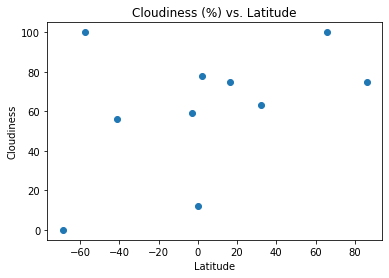

In [25]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness (%) vs. Latitude')

Text(0.5, 1.0, 'Wind Speed (mph) vs. Latitude')

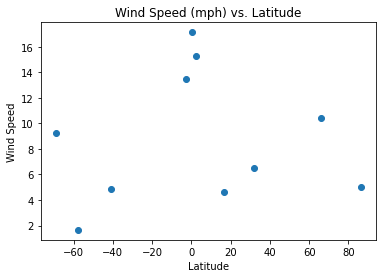

In [26]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed (mph) vs. Latitude')

Text(0.5, 1.0, 'Temperature (F) vs. Latitude')

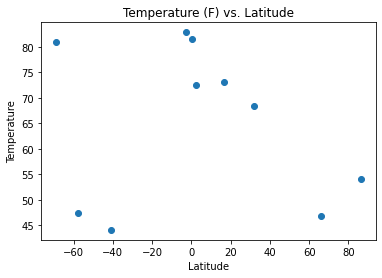

In [27]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature (F) vs. Latitude')

TypeError: unhashable type: 'numpy.ndarray'

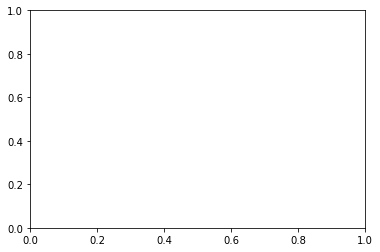

In [34]:
x_values = cities_df.loc[cities_df['Latitude'].astype(float) < 0, :]

x_values